In [ ]:
from audio_classifier.tune import get_train_test_split, tune, evaluate
from audio_classifier.seeds import set_all_seeds

from joblib import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
set_all_seeds(0)

X_train, X_test, y_train, y_test = get_train_test_split('../recordings')

param_grid = {
        "summary_stats__n_mels" : np.array([32, 64]),
        "pca__n_components" : np.arange(16, 72, 4),
        "classifier__n_neighbors" : np.arange(1,24,1)
    }

tune(X_train, y_train, param_grid, output='../searches/grid_search_3.joblib')

Fitting 5 folds for each of 308 candidates, totalling 1540 fits


In [4]:
search = load('../searches/grid_search_3.joblib')
print(search.best_params_)

y_pred, acc = evaluate(X_test, y_test, search.best_estimator_)
print(f"Test Accuracy: {100*acc:.2f}%")

{'classifier__n_neighbors': 4, 'pca__n_components': 60, 'summary_stats__n_mels': 128}
Test Accuracy: 94.27%


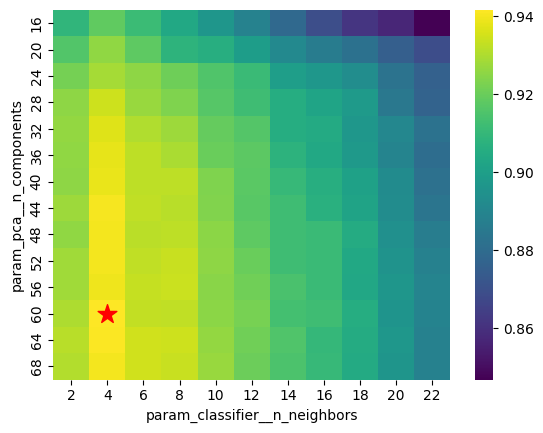

In [5]:
df = pd.DataFrame(search.cv_results_)

sns.heatmap(df.pivot_table(index="param_pca__n_components", columns="param_classifier__n_neighbors", values="mean_test_score"),fmt=".3f", cmap="viridis")
plt.scatter(np.where(param_grid['classifier__n_neighbors']==search.best_params_["classifier__n_neighbors"])[0]+0.5,
            np.where(param_grid['pca__n_components']==search.best_params_["pca__n_components"])[0]+0.5, 
            marker="*", s=200, c="r")
plt.show()